In [1]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the credit default dataset.
# The dataset can be downloaded here: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 
# OR https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset.
df = pd.read_csv('./drive/My Drive/ML_Code/Credit Default Prediction/credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [0]:
# Split a dataset into X and y.
X = df.drop('defaulted',axis=1)
y = df['defaulted']

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# Run the random forest with default parameters.
%%time
rfc = RandomForestClassifier()

CPU times: user 39 µs, sys: 9 µs, total: 48 µs
Wall time: 52.5 µs


In [8]:
# Fit the random forest model.
%%time
rfc.fit(X_train, y_train)

CPU times: user 5.49 s, sys: 4.55 ms, total: 5.49 s
Wall time: 5.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Make predictions.
%%time
y_pred = rfc.predict(X_test)

CPU times: user 178 ms, sys: 886 µs, total: 179 ms
Wall time: 179 ms


In [10]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.66      0.37      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



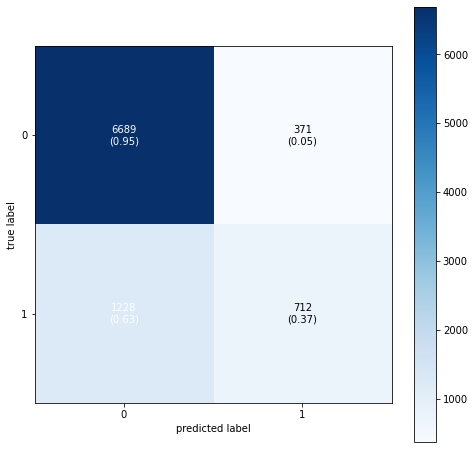

CPU times: user 173 ms, sys: 6.02 ms, total: 179 ms
Wall time: 201 ms


In [11]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(8,8))
plt.show()

In [12]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

Accuracy: 0.8223333333333334 



### **Hyperparameter Tuning**

In [13]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'max_depth': range(2, 20, 5)}

# Random Forest model
rfc = RandomForestClassifier()

# Set up GridSearchCV() funcion.
rfc = GridSearchCV(rfc, hyper_params, cv=n_folds, scoring="accuracy")

# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 1min 47s, sys: 58.1 ms, total: 1min 47s
Wall time: 1min 47s


In [14]:
# Cross-Validation results.
cv_results = pd.DataFrame(rfc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.840982,0.010130,0.016223,0.002843,2,{'max_depth': 2},0.806667,0.805714,0.801905,0.800952,0.802857,0.793810,0.794762,0.796667,0.797619,0.798095,0.799905,0.004194,4
1,2.107498,0.013382,0.022244,0.001183,7,{'max_depth': 7},0.823810,0.824286,0.826190,0.820476,0.819048,0.810952,0.816667,0.807619,0.804286,0.822381,0.817571,0.007157,2
2,3.235987,0.031495,0.032840,0.002015,12,{'max_depth': 12},0.823810,0.821429,0.826190,0.819524,0.821429,0.813333,0.816190,0.808571,0.810476,0.820000,0.818095,0.005488,1
3,4.066148,0.046652,0.043365,0.000529,17,{'max_depth': 17},0.820952,0.817143,0.819048,0.823810,0.816667,0.808095,0.816190,0.810476,0.814286,0.820952,0.816762,0.004596,3


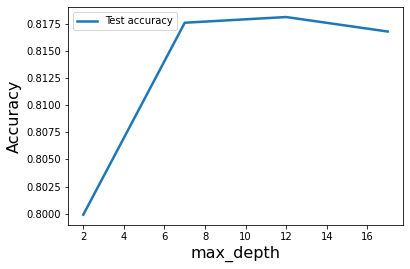

In [15]:
# Plot test accuracies with max_depth.
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_max_depth"], cv_results["mean_test_score"], label="Test accuracy", linewidth=2.5)
plt.xlabel("max_depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend()
plt.show()

In [16]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'n_estimators': range(100, 1500, 400)}

# Random Forest model
rfc = RandomForestClassifier(max_depth=6)

# Set up GridSearchCV() funcion.
rfc = GridSearchCV(rfc, hyper_params, cv=n_folds, scoring="accuracy")

# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 8min 38s, sys: 217 ms, total: 8min 38s
Wall time: 8min 38s


In [17]:
# Cross-Validation results.
cv_results = pd.DataFrame(rfc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.848071,0.025832,0.020884,0.001738,100,{'n_estimators': 100},0.821429,0.819524,0.821429,0.819524,0.817143,0.808571,0.807143,0.806667,0.811429,0.817143,0.815000,0.005639,1
1,9.138484,0.052183,0.094162,0.001574,500,{'n_estimators': 500},0.821905,0.820952,0.818095,0.813810,0.817143,0.810476,0.808571,0.808095,0.810476,0.818571,0.814810,0.004909,3
2,16.432984,0.059960,0.173480,0.019832,900,{'n_estimators': 900},0.820476,0.821429,0.819048,0.815238,0.819524,0.810952,0.809048,0.807143,0.804762,0.822381,0.815000,0.006173,1
3,23.689813,0.080145,0.246046,0.009909,1300,{'n_estimators': 1300},0.821905,0.820000,0.820000,0.815238,0.817143,0.810476,0.808571,0.808571,0.803810,0.820476,0.814619,0.005993,4


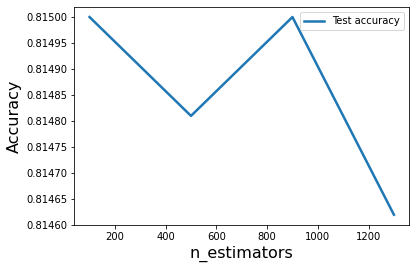

In [18]:
# Plot test accuracies with max_depth.
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_n_estimators"], cv_results["mean_test_score"], label="Test accuracy", linewidth=2.5)
plt.xlabel("n_estimators", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend()
plt.show()

In [19]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'max_features': [4, 8, 14, 20, 24]}

# Random Forest model
rfc = RandomForestClassifier(max_depth=6)

# Set up GridSearchCV() funcion.
rfc = GridSearchCV(rfc, hyper_params, cv=n_folds, scoring="accuracy")

# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 4min 51s, sys: 52 ms, total: 4min 51s
Wall time: 4min 52s


In [20]:
# Cross-Validation results.
cv_results = pd.DataFrame(rfc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.846149,0.020484,0.025296,0.015475,4,{'max_features': 4},0.820952,0.817619,0.822857,0.816190,0.815714,0.810000,0.810000,0.806667,0.806667,0.820476,0.814714,0.005692,5
1,3.335710,0.014387,0.020863,0.001847,8,{'max_features': 8},0.824286,0.822857,0.825714,0.826190,0.820476,0.815714,0.814762,0.812381,0.808571,0.820476,0.819143,0.005702,2
2,5.637032,0.040192,0.019834,0.000318,14,{'max_features': 14},0.823333,0.821429,0.824286,0.825238,0.817619,0.815238,0.815714,0.813333,0.810952,0.820000,0.818714,0.004642,4
3,7.870207,0.037199,0.019700,0.000198,20,{'max_features': 20},0.824286,0.821905,0.823810,0.826667,0.817143,0.815714,0.814286,0.815238,0.809048,0.820952,0.818905,0.005212,3
4,9.365761,0.030435,0.019946,0.000579,24,{'max_features': 24},0.825238,0.823333,0.824762,0.826190,0.816667,0.817143,0.815238,0.813810,0.810000,0.820000,0.819238,0.005235,1


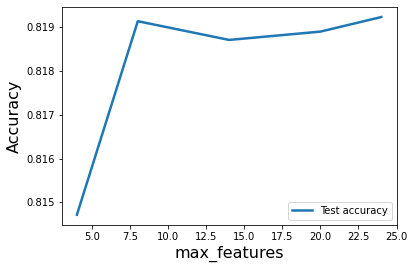

In [21]:
# Plot test accuracies with max_depth.
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_max_features"], cv_results["mean_test_score"], label="Test accuracy", linewidth=2.5)
plt.xlabel("max_features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend()
plt.show()

In [22]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'min_samples_leaf': range(100, 400, 50)}

# Random Forest model
rfc = RandomForestClassifier()

# Set up GridSearchCV() funcion.
rfc = GridSearchCV(rfc, hyper_params, cv=n_folds, scoring="accuracy")

# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 2min 13s, sys: 52 ms, total: 2min 13s
Wall time: 2min 13s


In [23]:
# Cross-Validation results.
cv_results = pd.DataFrame(rfc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.556059,0.032019,0.026794,0.000294,100,{'min_samples_leaf': 100},0.819524,0.820952,0.825714,0.815714,0.820000,0.811905,0.813333,0.812857,0.806190,0.820476,0.816667,0.005413,1
1,2.337767,0.030867,0.025820,0.001892,150,{'min_samples_leaf': 150},0.821429,0.815714,0.813810,0.810476,0.814762,0.808095,0.811429,0.799524,0.804286,0.816190,0.811571,0.006020,2
2,2.179288,0.027959,0.024146,0.000362,200,{'min_samples_leaf': 200},0.819524,0.815714,0.813333,0.810952,0.812857,0.809524,0.806190,0.803333,0.803810,0.815714,0.811095,0.005116,3
3,2.046273,0.018214,0.023007,0.000207,250,{'min_samples_leaf': 250},0.818095,0.813810,0.811905,0.810476,0.813810,0.802857,0.809524,0.802857,0.803810,0.812857,0.810000,0.004972,4
4,1.948252,0.025143,0.022562,0.000245,300,{'min_samples_leaf': 300},0.812857,0.813810,0.811429,0.810476,0.810000,0.803810,0.805714,0.802381,0.803333,0.811429,0.808524,0.004054,5
5,1.872071,0.015552,0.022684,0.001500,350,{'min_samples_leaf': 350},0.816667,0.811429,0.810476,0.808095,0.811429,0.799048,0.804286,0.797619,0.803333,0.807143,0.806952,0.005639,6


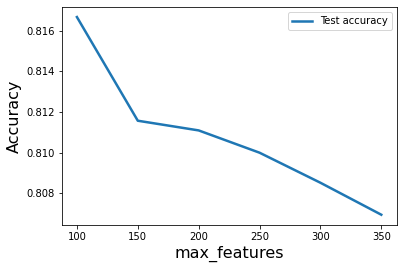

In [24]:
# Plot test accuracies with max_depth.
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_min_samples_leaf"], cv_results["mean_test_score"], label="Test accuracy", linewidth=2.5)
plt.xlabel("max_features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend()
plt.show()

In [25]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'min_samples_split': range(200, 500, 50)}

# Random Forest model
rfc = RandomForestClassifier()

# Set up GridSearchCV() funcion.
rfc = GridSearchCV(rfc, hyper_params, cv=n_folds, scoring="accuracy")

# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 3min 15s, sys: 49 ms, total: 3min 15s
Wall time: 3min 15s


In [26]:
# Cross-Validation results.
cv_results = pd.DataFrame(rfc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.442100,0.025927,0.030719,0.001393,200,{'min_samples_split': 200},0.823810,0.823810,0.828095,0.824762,0.822381,0.813810,0.816190,0.812857,0.810952,0.821429,0.819810,0.005570,1
1,3.282255,0.030304,0.029026,0.000523,250,{'min_samples_split': 250},0.821429,0.821429,0.827143,0.824762,0.819048,0.815238,0.816190,0.813810,0.810000,0.822381,0.819143,0.005025,2
2,3.173257,0.046523,0.027923,0.000569,300,{'min_samples_split': 300},0.821429,0.824762,0.827619,0.822381,0.820476,0.814286,0.814286,0.813333,0.811429,0.820952,0.819095,0.005144,3
3,3.087173,0.035492,0.027657,0.001533,350,{'min_samples_split': 350},0.823333,0.822857,0.824762,0.825238,0.820000,0.816190,0.815238,0.812857,0.811429,0.818095,0.819000,0.004740,4
4,3.084661,0.079770,0.026879,0.001245,400,{'min_samples_split': 400},0.821429,0.822857,0.825238,0.824762,0.820000,0.815714,0.814286,0.812857,0.809048,0.821429,0.818762,0.005187,6
5,2.906227,0.023807,0.026775,0.002460,450,{'min_samples_split': 450},0.822381,0.825714,0.826667,0.823333,0.819524,0.813333,0.814286,0.812381,0.811905,0.820000,0.818952,0.005327,5


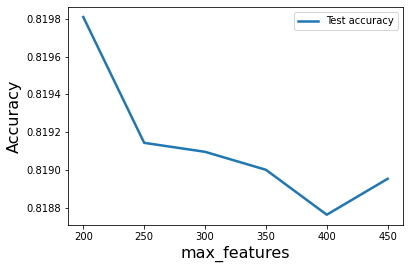

In [27]:
# Plot test accuracies with max_depth.
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_min_samples_split"], cv_results["mean_test_score"], label="Test accuracy", linewidth=2.5)
plt.xlabel("max_features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend()
plt.show()

### **Hyperparameter Tuning using Grid Search**

In [28]:
# Create a KFold object with 10 splits.
%%time
n_folds = 10

# Specify range of hyperparameters.
# Set the parameters by cross-validation
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Random Forest model
rfc = RandomForestClassifier()

# Set up GridSearchCV() funcion.
grid_search = GridSearchCV(rfc, param_grid, cv=n_folds, scoring="accuracy")

# Fit the model.
grid_search.fit(X_train, y_train)

CPU times: user 1h 14min 13s, sys: 1.24 s, total: 1h 14min 14s
Wall time: 1h 14min 16s


In [29]:
# Print the optimal accuracy score and hyperparameters.
print('Optimal accuracy:', grid_search.best_score_, 'using', grid_search.best_params_)

Optimal accuracy: 0.8189523809523809 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [30]:
# Randome Forest model with the optimal hyperparameters.
%%time
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)
# Fit the model.
rfc.fit(X_train, y_train)

CPU times: user 6.07 s, sys: 999 µs, total: 6.07 s
Wall time: 6.07 s


In [0]:
# Make predictions.
y_pred = rfc.predict(X_test)

In [32]:
# Print classiffication report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



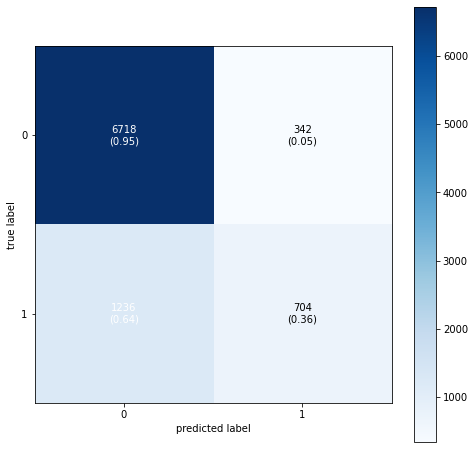

CPU times: user 162 ms, sys: 4 ms, total: 166 ms
Wall time: 166 ms


In [33]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(8,8))
plt.show()

In [34]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")

Accuracy: 0.8246666666666667 

